## Upload your API output text file to the environment or place it in the same folder where this notebook is. Alternatively you will need to update the path in the second code cell.

In [1]:
# Run to load imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Change the name of the file in data = '' and then run all the cells.

In [ ]:
# Read the first few lines of the newly uploaded file to understand its structure

data = 'EpiPrgSupport.txt'
with open(data, 'r') as file:
    data_lines = [file.readline().strip() for _ in range(5)]

data_lines

# If all looks good, clear the previous output, then run the next cell. This will load the data into a dataframe, show your columns and a data sample, and tell you how many results are in the file.

In [4]:
# Read the entire file and parsing it as JSON
with open(data, 'r') as file:
    data_content = file.read()

# Parse the JSON content
data_json = json.loads(data_content)

# Extract the grant details from the "rows" key
grants_data = data_json["data"]["rows"]

# Convert to a pandas DataFrame
df = pd.DataFrame(grants_data)

# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows
print("First 5 rows:")
display(df.head())

# Display all the column headers
print("List of Column headers:")
display(df.columns.tolist())

# Display the count of the rows
total_results = len(df)
print(f"Total number of API CALL results: {total_results}")

First 5 rows:


,funder_key,funder_profile_url,funder_name,funder_city,funder_state,funder_country,funder_type,funder_zipcode,funder_country_code,funder_ein,funder_gs_profile_update_level,recip_key,recip_name,recip_city,recip_state,recip_country,recip_zipcode,recip_country_code,recip_ein,recip_organization_code,recip_organization_tran,recip_gs_profile_link,recip_gs_profile_update_level,grant_key,amount_usd,grant_subject_code,grant_subject_tran,grant_population_code,grant_population_tran,grant_strategy_code,grant_strategy_tran,grant_transaction_code,grant_transaction_tran,grant_geo_area_code,grant_geo_area_tran,year_issued,grant_duration,grant_description,last_updated
0,GATE023,https://fconline.foundationcenter.org/fdo-gran...,BILL & MELINDA GATES FOUNDATION,Seattle,WA,United States,Family foundations,98109-4636,6252001,56-2618866,Silver 2021,902117,University of Washington Foundation,Seattle,WA,United States,98195-0001,6252001,51-0193884,EA040000,Public charities,https://www.guidestar.org/Profile/51-0193884,None,hgrant-transaction-267683,424695.0,SE150801; SE130300; ST000000; SE030000; SB000000,HIV/AIDS; Epidemiology; International relation...,None,None,UM0100; UN0000; UM0200,Research; Program support; Program evaluations,TA00,Cash grants,6255146,,2023,None,to evaluate the public health impact of using ...,2023-07-28 16:30:52.000
1,GATE023,https://fconline.foundationcenter.org/fdo-gran...,BILL & MELINDA GATES FOUNDATION,Seattle,WA,United States,Family foundations,98109-4636,6252001,56-2618866,Silver 2021,CEI15046957,The Rostropovich-Vishnevskaya Foundation,None,WA,United States,None,6252001,None,None,None,None,None,hgrant-transaction-275489,299865.0,SE130100; SE130300; ST040000; SE151000,Communicable disease control; Epidemiology; In...,None,None,UM0100; UN0000,Research; Program support,TA00,Cash grants,6255147,,2023,None,To enhance Rotavirus disease surveillance in a...,2023-07-28 16:31:37.000
2,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,5639080,Temple University-Of the Commonwealth System o...,Philadelphia,PA,United States,19122-6096,6252001,None,EA040000,Public charities,None,None,49564377,982712.0,SE130300; SE020000; SJ040000; SR040200,Epidemiology; Health care access; Legal servic...,PE000000,Ethnic and racial groups,UD0000; UJ0000; UK0000; UN0000; UM0100,Capacity-building and technical assistance; Ne...,TA00,Cash grants,6252001,United States,2022,24.00,"To (1) support public health practitioners, at...",2022-02-11 01:00:00.000
3,JOHN015,https://fconline.foundationcenter.org/fdo-gran...,The Robert Wood Johnson Foundation,Princeton,NJ,United States,Independent foundations,08540-6614,6252001,22-6029397,None,932616,Temple University,Philadelphia,PA,United States,191226094,6252001,23-1365971,EA040000; EF000000,Public charities; Schools,https://www.guidestar.org/Profile/23-1365971,None,hgrant-transaction-225411,982712.0,SR040200; SE130300; SE020000; SJ040000,Ethnic and racial minority rights; Epidemiolog...,PE000000,Ethnic and racial groups,UK0000; UM0100; UJ0000; UN0000; UD0000,"Policy, advocacy and systems reform; Research;...",TA00,Cash grants,6252001,United States,2022,24.00,"To (1) support public health practitioners, at...",2023-07-28 16:31:40.000
4,MISS071,https://fconline.foundationcenter.org/fdo-gran...,MISSOURI FOUNDATION FOR HEALTH,St Louis,MO,United States,Public charities,63110-3840,6252001,43-1880952,Gold 2023,5103586,WASHINGTON UNIVERSITY,St Louis,MO,United States,63112-1408,6252001,43-0653611,EA040000,Public charities,https://www.guidestar.org/Profile/43-0653611,None,egrant-transaction-6304,356615.0,SE150801; SE130500; SE130300; SE050800; SE1301...,HIV/AIDS; Sexually transmitted disease control...,PH020100,People with HIV/AIDS,UK0100; UN0000,Advocacy; Program support,TA00,Cash grants,4407066,St. Louis,2022,30.00,The project goal is to improve HIV testing coo...,2023-06-22 02:10:22.000


List of Column headers:


['funder_key',
 'funder_profile_url',
 'funder_name',
 'funder_city',
 'funder_state',
 'funder_country',
 'funder_type',
 'funder_zipcode',
 'funder_country_code',
 'funder_ein',
 'funder_gs_profile_update_level',
 'recip_key',
 'recip_name',
 'recip_city',
 'recip_state',
 'recip_country',
 'recip_zipcode',
 'recip_country_code',
 'recip_ein',
 'recip_organization_code',
 'recip_organization_tran',
 'recip_gs_profile_link',
 'recip_gs_profile_update_level',
 'grant_key',
 'amount_usd',
 'grant_subject_code',
 'grant_subject_tran',
 'grant_population_code',
 'grant_population_tran',
 'grant_strategy_code',
 'grant_strategy_tran',
 'grant_transaction_code',
 'grant_transaction_tran',
 'grant_geo_area_code',
 'grant_geo_area_tran',
 'year_issued',
 'grant_duration',
 'grant_description',
 'last_updated']

Total number of API CALL results: 25


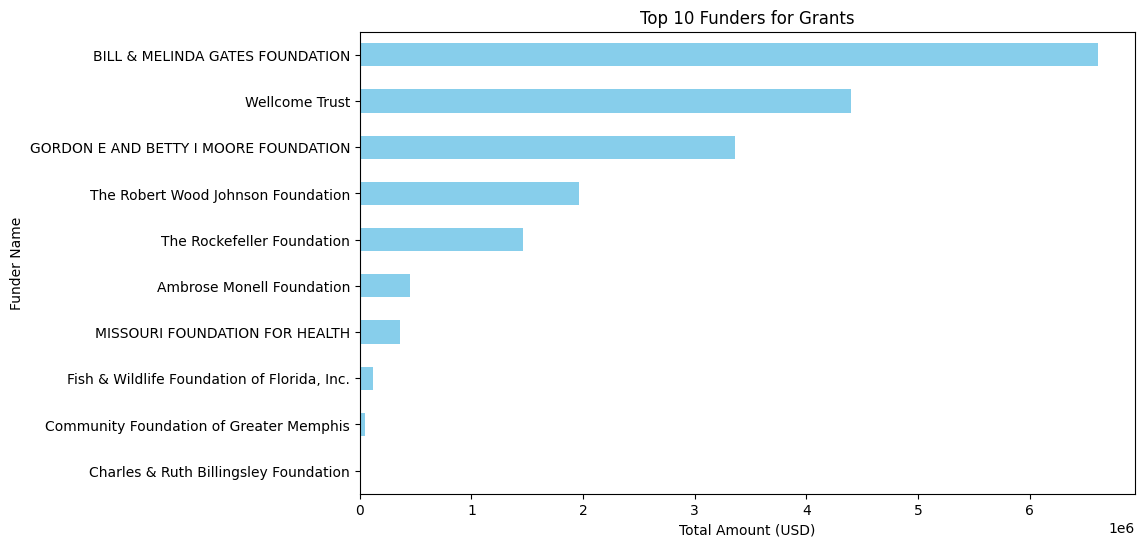

In [5]:
# Identify the top 10 funders by total grant amount for grants
top_funders = df.groupby('funder_name')['amount_usd'].sum().nlargest(10)

# Plot the top 10 funders
top_funders_plot = top_funders.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Funders for Grants')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Funder Name')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the largest value at the top
plt.show()


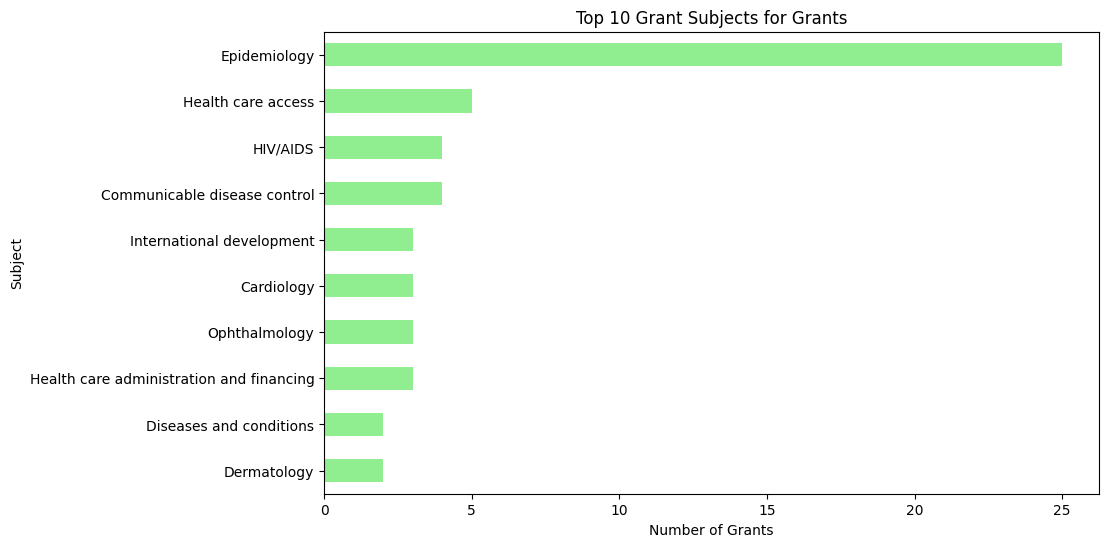

In [6]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# Read the content of the new data file
with open(data, 'r') as file:
    data_content_new = file.read()
data_json_new = json.loads(data_content_new)

# Extract the grant details from the "rows" key
grants_data_new = data_json_new["data"]["rows"]

# Convert to a pandas DataFrame
df_new = pd.DataFrame(grants_data_new)

# Strip leading and trailing spaces from the 'grant_subject_tran' values
df_new['grant_subject_tran'] = df_new['grant_subject_tran'].apply(lambda subjects: [subject.strip() for subject in str(subjects).split(';')] if subjects else [])

# Use the 'explode' method to create separate rows for each unique subject
df_exploded_subjects_new = df_new.explode('grant_subject_tran')

# Grab the top 10 grant subjects by count
top_subjects_new = df_exploded_subjects_new['grant_subject_tran'].value_counts().nlargest(10)

import matplotlib.pyplot as plt

# Plot the top 10 grant subjects
top_subjects_plot_new = top_subjects_new.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 Grant Subjects for Grants')
plt.xlabel('Number of Grants')
plt.ylabel('Subject')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the largest value at the top
plt.show()

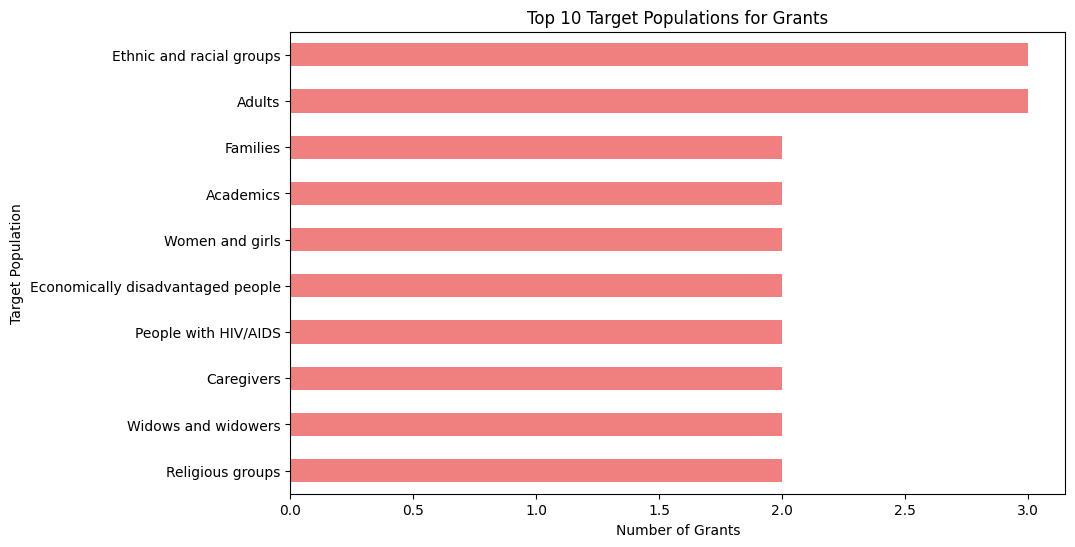

In [7]:
# Split the 'grant_population_tran' column by semicolons and stripping spaces
df['grant_population_tran'] = df['grant_population_tran'].apply(lambda x: [item.strip() for item in str(x).split(';')] if x else [])

# Use the 'explode' method to create separate rows for each unique target population
df_exploded_populations = df.explode('grant_population_tran')

# Analyze the top 10 target populations by count
top_populations = df_exploded_populations['grant_population_tran'].value_counts().nlargest(10)

# Plot the top 10 target populations
top_populations_plot = top_populations.plot(kind='barh', figsize=(10, 6), color='lightcoral')
plt.title('Top 10 Target Populations for Grants')
plt.xlabel('Number of Grants')
plt.ylabel('Target Population')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the largest value at the top
plt.show()

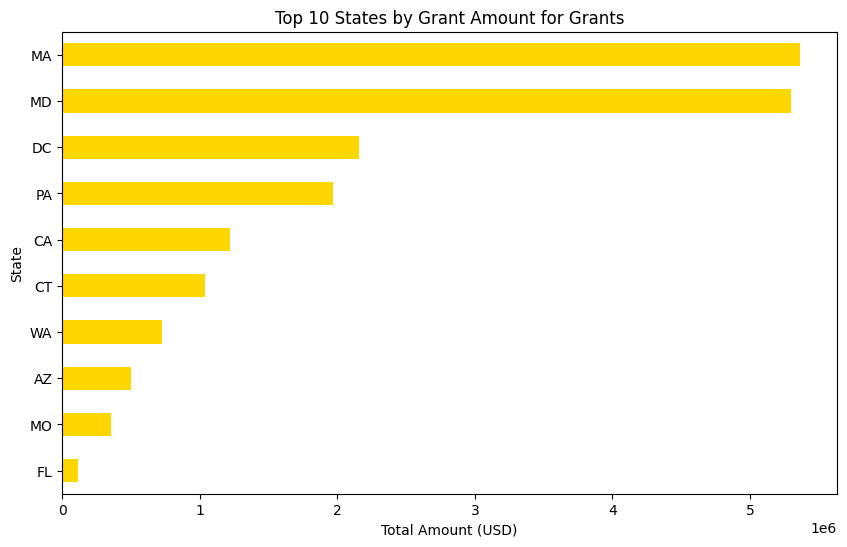

In [8]:
# Group by state and summing the grant amounts
health_admin_state_distribution = df.groupby('recip_state')['amount_usd'].sum().nlargest(10)

# Plotting the distribution across states
health_admin_state_distribution_plot = health_admin_state_distribution.plot(kind='barh', figsize=(10, 6), color='gold')
plt.title('Top 10 States by Grant Amount for Grants')
plt.xlabel('Total Amount (USD)')
plt.ylabel('State')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the largest value at the top
plt.show()

In [9]:
import plotly.express as px

# Read the entire file and parsing it as JSON
with open(data, 'r') as file:  # Update the file path as needed
    data_content = file.read()

# Parse the JSON content
data_json = json.loads(data_content)

# Extract the grant details from the "rows" key
grants_data = data_json["data"]["rows"]

# Convert to a pandas DataFrame
grants_df = pd.DataFrame(grants_data)

# Split the 'grant_subject_tran' and 'grant_population_tran' columns by semicolons and stripping spaces
grants_df['grant_subject_tran'] = grants_df['grant_subject_tran'].apply(lambda x: [item.strip() for item in str(x).split(';')] if x else [])
grants_df['grant_population_tran'] = grants_df['grant_population_tran'].apply(lambda x: [item.strip() for item in str(x).split(';')] if x else [])

# Use the 'explode' method to create separate rows for each unique subject and population
df_exploded_subjects_populations = grants_df.explode('grant_subject_tran').explode('grant_population_tran')

# Create a pivot table for heatmap
pivot_table_subjects_populations = pd.pivot_table(df_exploded_subjects_populations, values='amount_usd', index='grant_subject_tran', columns='grant_population_tran', aggfunc='sum')

# Make an interactive heatmap using Plotly Express
fig_heatmap = px.imshow(pivot_table_subjects_populations, title='Grants by Subject and Target Population')
# Update the layout to make the heatmap larger
fig_heatmap.update_layout(width=800, height=600)
fig_heatmap.show()

In [10]:
import plotly.express as px

# Use the 'explode' method to create separate rows for each unique subject
df_exploded_subjects = grants_df.explode('grant_subject_tran')

# Make an interactive scatter plot using Plotly Express, with subject on the x-axis, amount on the y-axis, and awarder as color
fig_scatter = px.scatter(df_exploded_subjects, x='grant_subject_tran', y='amount_usd', color='funder_name', title='Grants by Subject and Awarder')
fig_scatter.update_layout(width=800, height=600)
fig_scatter.show()

In [11]:
import plotly.express as px

# Calculate the sum of grant amounts by subject
subject_amounts = df_exploded_subjects_populations.groupby('grant_subject_tran')['amount_usd'].sum().reset_index()

# Threshold to determine smaller categories
threshold = subject_amounts['amount_usd'].quantile(0.75)  # You can adjust this value

# Aggregate smaller categories into "Other"
subject_amounts['subject'] = subject_amounts.apply(lambda row: row['grant_subject_tran'] if row['amount_usd'] > threshold else 'Other', axis=1)
subject_amounts_aggregated = subject_amounts.groupby('subject')['amount_usd'].sum().reset_index()

# Make an interactive pie chart using Plotly Express
fig_pie = px.pie(subject_amounts_aggregated, values='amount_usd', names='subject', title='Distribution of Grants by Subject')
fig_pie.update_layout(width=800, height=600)
fig_pie.show()
